In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz

from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Decision Tree Exercise

> Contributors: Eric Keränen, Samuel Aitamaa & Teemu Luhtanen

Phishing refers to a family of online frauds where an Internet user is lured into submitting
his/her sensitive data for malicious purposes.

Your goal is to construct a small yet useful decision tree that predicts whether a website is a
phishing site or not.

## Part I

Create the decision tree and show an image of the final decision tree.

In [2]:
df = pd.read_csv("phishing.csv", sep = ";", na_values = "?")
df.fillna(0, inplace = True)

# In the results a '1' corresponds to a phishing site and a '-1' to a legitimate site
df.tail(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11045,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,0,-1,1,0,1,1
11046,-1,-1,1,1,1,-1,1,1,-1,1,...,1,1,1,1,0,-1,1,1,1,1
11047,-1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11048,1,-1,1,1,1,-1,-1,1,1,1,...,1,1,1,1,0,-1,1,0,1,1
11049,-1,-1,1,1,-1,-1,1,-1,1,1,...,1,1,-1,1,1,-1,1,1,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [3]:
# Save column names
colnames = df.columns
colnames = colnames.drop("Result")

# Extract the labels and features into separate variables
labels = df["Result"]
features = df.drop("Result", axis = 1)

# Decision tree classification
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(features, labels)

DecisionTreeClassifier(max_depth=2)

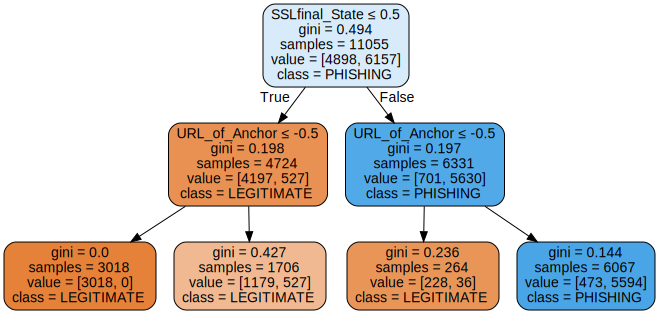

In [4]:
dot_data = tree.export_graphviz(
    classifier,
    out_file=None,
    feature_names=colnames,
    class_names=['LEGITIMATE','PHISHING'],
    filled=True,
    rounded=True,
    special_characters=True,
)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph

## Part II

Show the accuracy estimate (percentage of correct classifications) of your decision tree.

<AxesSubplot:>

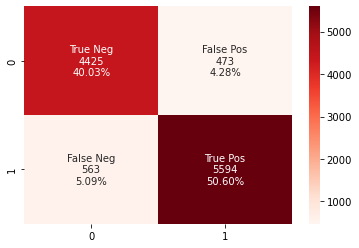

In [5]:
# Predict
predictions = classifier.predict(features)
cm = confusion_matrix(labels, predictions)

# Prepare data for confusion matrix heatmap
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
group_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
group_labels = np.asarray(group_labels).reshape(2,2)

# Display confusion matrix in a heatmap
sns.heatmap(cm, annot=group_labels, fmt="", cmap="Reds")

In [6]:
accuracy = accuracy_score(labels, predictions)
print (f"Accuracy calculated from the training set = {round(accuracy * 100, 2)} %")

Accuracy calculated from the training set = 90.63 %


In [7]:
print (classification_report(labels, predictions, target_names=['LEGITIMATE', 'PHISHING']))

              precision    recall  f1-score   support

  LEGITIMATE       0.89      0.90      0.90      4898
    PHISHING       0.92      0.91      0.92      6157

    accuracy                           0.91     11055
   macro avg       0.90      0.91      0.91     11055
weighted avg       0.91      0.91      0.91     11055



In [8]:
# Cross-validation with k number of folds
k = 10
scores = cross_val_score(
    estimator=classifier,
    X=features,
    y=labels,
    scoring="accuracy",
    cv=k
)
print ("Accuracies from %d individual folds:" % k)
for score in scores:
    print (f"{round(score * 100, 2)} %")
print (f"Accuracy calculated using {k}-fold cross validation = {round(scores.mean() * 100, 2)} %")

Accuracies from 10 individual folds:
89.78 %
89.6 %
90.14 %
90.78 %
90.6 %
92.04 %
90.41 %
89.86 %
91.76 %
91.31 %
Accuracy calculated using 10-fold cross validation = 90.63 %


## Part III

Write instructions for an internet analyst to make the decision of whether the website
is likely to be a phishing site or not. The instructions must match one-to-one with your
decision tree.

### Instructions

To determine if a site is legitimate or not, you have to check a couple of things. But the following two things are the biggest factors in determining a sites legitimacy:

1. Check that the site uses `https` protocol. This means the website has an <u>SSL certificate</u>. Also check that the certificate is <u>over one year old</u> and that it is issued by a <u>trusted issuer</u>. Trusted SSL issuers include, but are not limited to: DigiCert, GoDaddy, Network Solutions and RapidSSLonline. If these criteria are fulfilled, the website is very likely to be a legitimate one.

2. Another big factor would be the <u>amount of links on the website that lead to other websites</u>. If there are a lot of links that lead to other websites, it is not considered as activity of a legitimate site.

If these two criteria are NOT fulfilled, the site has a very high likelihood to be a phising site. If they are fulfilled, then it has a very high likelihood to be a legitimate one.

Safe browsing! :>

## Part IV

The Python code used to complete this task.

```python

import numpy as np
import pandas as pd
import seaborn as sns
import graphviz

from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv("phishing.csv", sep = ";", na_values = "?")
df.fillna(0, inplace = True)

# In the results a '1' corresponds to a phishing site and a '-1' to a legitimate site
df.tail(10)

# Save column names
colnames = df.columns
colnames = colnames.drop("Result")

# Extract the labels and features into separate variables
labels = df["Result"]
features = df.drop("Result", axis = 1)

# Decision tree classification
classifier = tree.DecisionTreeClassifier(max_depth=2)
classifier.fit(features, labels)

dot_data = tree.export_graphviz(
    classifier,
    out_file=None,
    feature_names=colnames,
    class_names=['LEGITIMATE','PHISHING'],
    filled=True,
    rounded=True,
    special_characters=True,
)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph

# Predict
predictions = classifier.predict(features)
cm = confusion_matrix(labels, predictions)

# Prepare data for confusion matrix heatmap
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
group_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
group_labels = np.asarray(group_labels).reshape(2,2)

# Display confusion matrix in a heatmap
sns.heatmap(cm, annot=group_labels, fmt="", cmap="Reds")

accuracy = accuracy_score(labels, predictions)
print (f"Accuracy calculated from the training set = {round(accuracy * 100, 2)} %")

print (classification_report(labels, predictions, target_names=['LEGITIMATE', 'PHISHING']))

# Cross-validation with k number of folds
k = 10
scores = cross_val_score(
    estimator=classifier,
    X=features,
    y=labels,
    scoring="accuracy",
    cv=k
)
print ("Accuracies from %d individual folds:" % k)
for score in scores:
    print (f"{round(score * 100, 2)} %")
print (f"Accuracy calculated using {k}-fold cross validation = {round(scores.mean() * 100, 2)} %")

```